In [2]:
import numpy
import pandas

import matplotlib
from matplotlib import pyplot
%matplotlib inline

import scipy
from scipy import stats



In [ ]:
# TODO vedere se il grafo finale non è scale free, 
# non è reticolo geometrico.
# è una specie di vetro

In [2]:
# Tre = roma.net == 99
# treCell = roma[Tre].reset_index(drop=True)
# treCell

# TODO snellire il dataframe iniziale levando le colonne inutili

dataframe = pandas.read_csv("../data/cell_towers_diff-2016012100.csv")
troncato = dataframe[50:70]
ordinato = troncato.reset_index(drop=True)
ordinato

,radio,mcc,net,area,cell,unit,lon,lat,range,samples,changeable,created,updated,averageSignal
0,GSM,262,7,20208,22311,NaN,13.451345,52.451001,178964,8174,1,1304784457,1453336789,-71
1,GSM,262,7,20208,42303,NaN,13.446594,52.453607,154650,7151,1,1304784457,1453336395,-69
2,GSM,262,1,17426,40228,NaN,11.599694,49.895716,139228,10302,1,1304947912,1453335354,-51
3,GSM,262,3,4417,55777,NaN,11.584462,49.895334,139936,2167,1,1304947912,1453335354,-78
4,GSM,262,7,50836,28074,NaN,11.602636,49.896744,139009,1385,1,1304947912,1453335354,-72
5,GSM,262,3,4417,52707,NaN,11.615497,49.944321,134295,439,1,1304947912,1453335354,-83
6,GSM,262,3,4417,557,NaN,11.591642,49.912699,138104,1045,1,1304947912,1453335354,-77
7,GSM,262,7,50836,28496,NaN,11.581390,49.882920,59746,797,1,1304947912,1453335354,-77
8,GSM,262,1,17426,2470,NaN,11.599449,49.884277,21773,507,1,1304947912,1453335354,-81
9,GSM,262,3,4417,17127,NaN,11.594675,49.937884,57527,1161,1,1304947912,1453335354,-70


In [4]:
roma = pandas.read_csv("../data/Roma_towers.csv")


In [ ]:

# condizioni di filtro
raggioMin = 1
# raggioMax = 1000
raggiPositivi = roma.range >= raggioMin
# raggiCorti = roma.range < raggioMax

# query con le condizioni
#romaFiltrato = roma[raggiPositivi & raggiCorti]
romaFiltrato = roma[raggiPositivi]
raggi = romaFiltrato.range

print max(raggi)


In [6]:

# criteri di filtro per le compagnie telefoniche
isTim = roma.net == 1
isWind = roma.net == 88
isVodafone = roma.net == 10
isTre = roma.net == 99

# creazione dei dataframe separati per gestore
tim = roma[isTim].reset_index(drop=True)
wind = roma[isWind].reset_index(drop=True)
vodafone = roma[isVodafone].reset_index(drop=True)
tre = roma[isTre].reset_index(drop=True)
 

In [7]:
tim = romaFiltrato[isTim].reset_index(drop=True)
wind = romaFiltrato[isWind].reset_index(drop=True)
vodafone = romaFiltrato[isVodafone].reset_index(drop=True)
tre = romaFiltrato[isTre].reset_index(drop=True)


/usr/lib/python2.7/dist-packages/pandas/core/frame.py:1771: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


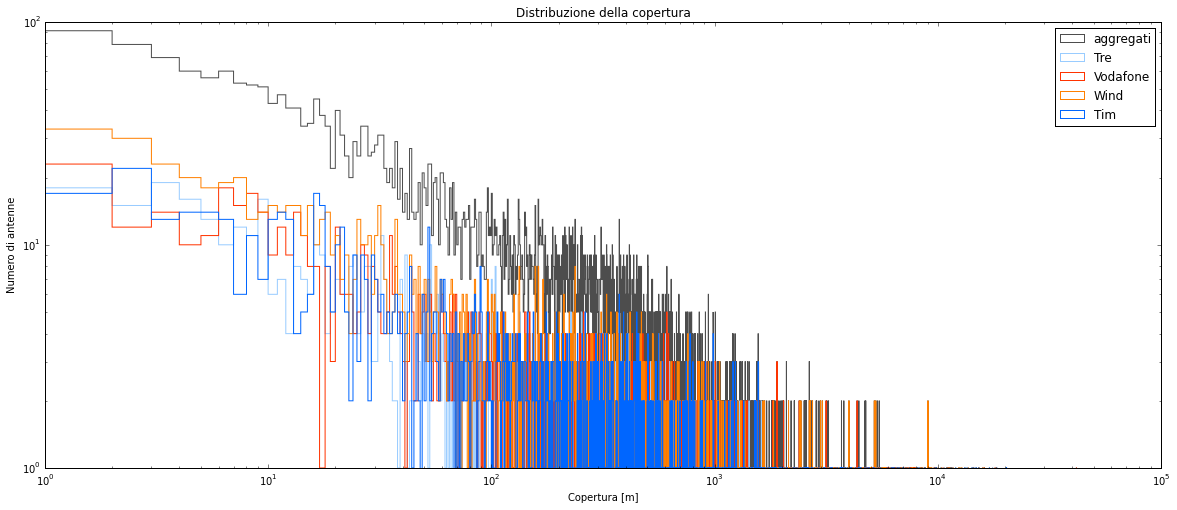

In [8]:
compagnie = ['Tim','Wind','Vodafone','Tre','aggregati']

colori = ['#0066ff','#ff8000','#ff3300','#99ccff','#4d4d4d']

valori = [tim.range.values, wind.range.values, vodafone.range.values, tre.range.values, raggi.values]

pyplot.figure(figsize=(20,8)) # dimensioni in pollici
distribuzioneRangeTutti = pyplot.hist(valori,
                                 bins=max(raggi)-min(raggi),
                                 histtype='step',
                                 label=compagnie,
                                 color=colori)
pyplot.title('Distribuzione della copertura')
pyplot.ylabel("Numero di antenne")
pyplot.xlabel("Copertura [m]")
# pyplot.gca().set_xscale("log")
# pyplot.gca().set_yscale("log")
pyplot.xscale("log")
pyplot.yscale("log")
pyplot.legend()

# TODO prendere colori aggiornati dal notebook di Iuri
# TODO mettere la legenda coi loghi delle compagnie
# oppure mettere direttamente le scritte del colore corrispondente,
# magari anche attaccate al relativo istogramma
# TODO levare il bordo del riquadro della legenda
# TODO provare istogramma stacked, in modo da dare il totale
# TODO scrivere che dietro il futuro istogramma equispaziato ci sta un giorno di lavoro

In [58]:

# logaritmic (base 2) binning in log-log (base 10) plots of integer histograms

def logBinnedHists():
    
    # int arrotonda all'intero inferiore
    linMin = 1
    linMax = 6570 #max(gradi[-1])
    
    # print linMin, linMax
    
    logStart = int(numpy.log2(linMin))
    logStop = int(numpy.log2(linMax))
    
    # print logStart, logStop
    
    nLogBins = logStop - logStart + 1
    
    # print nLogBins
    
    logBins = numpy.logspace(logStart, logStop, num=nLogBins, base=2, dtype=int)
    # print logBins
    
    # 1,2,4,8,16,32,64,128,256,512,1024
    
    ######################
    
#    linStart = 2**logStop + 1
#    linStop = linMax
    
    # print linStart, linStop
    
#    nLinBins = linStop - linStart + 1
    
    # print nLinBins
    
#    linBins = numpy.linspace(linStart, linStop, num=nLinBins, dtype=int)
    
    # print linBins
    
    ######################
    
#    bins = numpy.append(logBins, linBins)
    bins = logBins

    # print bins
    
    # print len(bins)
    
    
    
    
    # print totalValues
    # print len(totalValues)
    
    # uso le proprietà dei logaritmi in base 2:
    # 2^(n+1) - 2^n = 2^n
    correzioniDatiCanalizzatiLog = numpy.delete(logBins, -1)
    
    # print correzioniDatiCanalizzatiLog
    
    # print len(correzioniDatiCanalizzatiLog)
    
#    correzioniDatiCanalizzatiLin = numpy.ones(nLinBins, dtype=int)
    
    # print correzioniDatiCanalizzatiLin
    
    # print len(correzioniDatiCanalizzatiLin)
    
#    correzioniDatiCanalizzati = numpy.append(correzioniDatiCanalizzatiLog, correzioniDatiCanalizzatiLin)
    correzioniDatiCanalizzati = correzioniDatiCanalizzatiLog

    # print correzioniDatiCanalizzati
    
    # print len(correzioniDatiCanalizzati)
    
    
    
    
    x = numpy.concatenate(([0], bins))
    yTot = []
    
    # TODO rendere questa funzione generale!!!
    for i in range(5):
        totalValues, binEdges, otherBinNumbers = scipy.stats.binned_statistic(gradi[i],
                                                                         gradi[i],
                                                                         statistic='count',
                                                                         bins=bins)
    
        conteggi = totalValues/correzioniDatiCanalizzati
    
    # TODO caso speciale per il grafico di sotto
    # (per non fare vedere la parte oltre l'ultima potenza di 2)
#    l = len(correzioniDatiCanalizzatiLin)
#    conteggi[-l:] = numpy.zeros(l, dtype='int')
    
        y = numpy.concatenate(([0], conteggi, [0]))
        yTot.append(y)
    
    return x, yTot


In [56]:
gradi

[array([ 69.,  57.,  44., ...,  25.,  24.,  25.]),
 array([  59.,  199.,  687., ...,   44.,   70.,   64.]),
 array([ 547.,  536.,  146., ...,   23.,   11.,  250.]),
 array([ 12.,  10.,  15., ...,  42.,  30.,  32.]),
 array([ 2139.,   558.,  1874., ...,    81.,    92.,  1536.])]

TODO (futuristico):
vedere se esiste un modo per mettere due o più computer in rete a fare una piccola grid, per condividere la potenza di calcolo, la memoria ram e lo spazio su disco

## TODO prove da sistemare per canalizzazione logaritmic in base 2

In [ ]:
pyplot.figure(figsize=(20,8))
distribuzioneRange = pyplot.hist(raggi.values,\
                                 bins=div,\
                                 histtype='step')
pyplot.title('PROVA, CON CANALI NON ANCORA PESATI')
pyplot.xscale("log")
pyplot.yscale("log")


In [ ]:
a,b,c = distribuzioneRange
a1 = numpy.append(a.astype(int), 0)
b1 = b.astype(int)
a1
b1
div = numpy.logspace(start=0, stop=15, num=16, base=2).astype(int) # max = 20341
div
a2 = a1/div
a2

In [ ]:
pyplot.scatter(y=a2,x=div)
pyplot.xscale("log")
pyplot.yscale("log")


In [ ]:
# TODO vedere se le due slope del grafico log-log possono essere
# messe in relazione con le due slode della legge
# di Heap e di Zipf (o come cavolo si scrivono)

In [ ]:
# TODO esterno:

# datigenerati = numpy.random.normal(0,1, 10000)
# b = pylab.hist(datigenerati,bins=100, histtype='step')
# plottare la gaussiana di origine, 
# fare i residui e vedere che il loro istogramma 
# è di nuovo gaussiano e farne un fit e vedere 
# se il residui dei residui sono gaussiani, 
# che al mercato mio padre comprò


In [ ]:
# TODO
# fit e lot della distribuzione del grado con i due modelli di rete
# Erdos Renyi
# preferential attachement di Barabasi Albert


## distribuzione del grado

si fa un plot logaritmico unificato e poi i relativi fit con i vari modelli di rete

In [3]:

compagnie = ['Tim','Wind','Vodafone','Tre','aggregati']

colori = ['#0066ff','#ff8000','#ff3300','#99ccff','#4d4d4d']


gradi = [numpy.loadtxt("../data/DistrGrado_{0}".format(compagnia)) for compagnia in compagnie]

# dataframeGradi = pandas.DataFrame(numpy.transpose(gradi))

# grado = grafo.degree().values
# grado = numpy.loadtxt("../data/DistrGrado_{0}",compagnia)


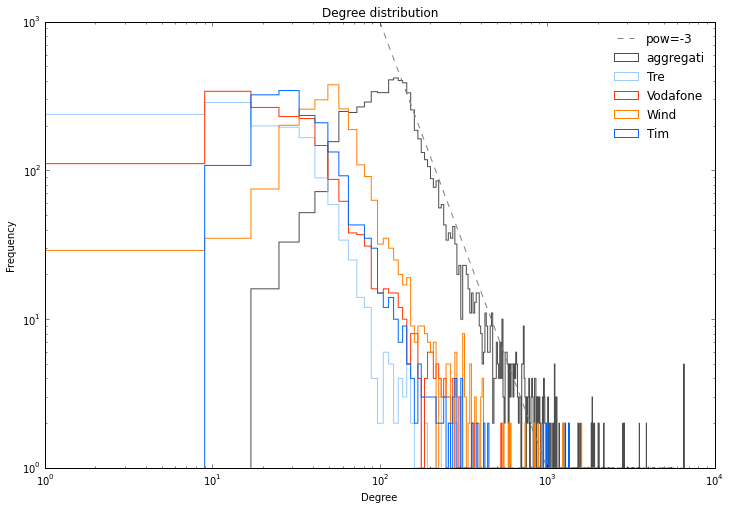

In [73]:
pyplot.figure(figsize=(12,8)) # dimensioni in pollici

distribuzioneRangeTutti = pyplot.hist(gradi,
                                 bins=(max(gradi[-1])-1)/8, #TODO smoothing dei canali 
                                 histtype='step',
                                 label=compagnie,
                                 color=colori)
#TODO oppure istogramma a scatterplot

#pyplot.plot((1,10**3), (10**6,1), linestyle="--", color="gray")
pyplot.plot((10**2,10**3), (10**3,10**0), linestyle="--", color="gray", label="pow=-3")

pyplot.title('Degree distribution')
pyplot.ylabel("Frequency")
pyplot.xlabel("Degree")
pyplot.xlim(10**0,10**4)
pyplot.ylim(10**0,10**3)
# pyplot.gca().set_xscale("log")
# pyplot.gca().set_yscale("log"
pyplot.xscale("log")
pyplot.yscale("log")
pyplot.legend(loc='upper right', frameon=False)


In [68]:
# TODO fare frequency-rank

In [14]:
x

array([   1,    2,    3, ..., 9997, 9998, 9999])

In [15]:
y

array([  101,   102,   103, ..., 10097, 10098, 10099])

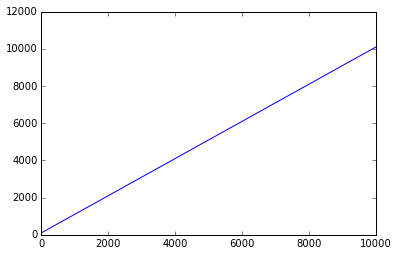

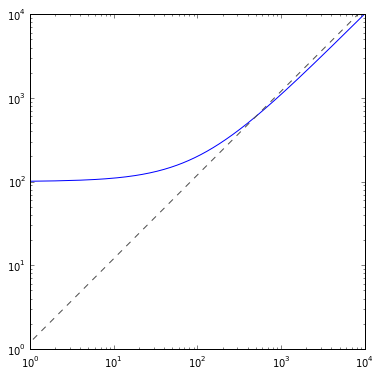

In [35]:
x = numpy.arange(1, 10000, dtype=int)
y = x + 100

pyplot.plot(x,y)

f, ax = pyplot.subplots(figsize=(6, 6))
ax.plot(x,y)
diag_line, = ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c="0.3")


pyplot.xlim(10**0,10**4)
pyplot.ylim(10**0,10**4)
pyplot.xscale("log")
pyplot.yscale("log")

In [36]:
ax.get_xlim()

(1.0, 10000.0)

In [30]:
distribuzioneRangeTutti

([array([ 0.,  0.,  0., ...,  0.,  0.,  0.]),
  array([ 0.,  0.,  0., ...,  0.,  0.,  0.]),
  array([ 0.,  0.,  0., ...,  0.,  0.,  0.]),
  array([  5.,  13.,  18., ...,   0.,   0.,   0.]),
  array([ 0.,  0.,  0., ...,  0.,  0.,  4.])],
 array([  1.00000000e+00,   2.00000000e+00,   3.00000000e+00, ...,
          6.56800000e+03,   6.56900000e+03,   6.57000000e+03]),
 <a list of 5 Lists of Patches objects>)

array([   0,    1,    2,    4,    8,   16,   32,   64,  128,  256,  512,
       1024, 2048, 4096])

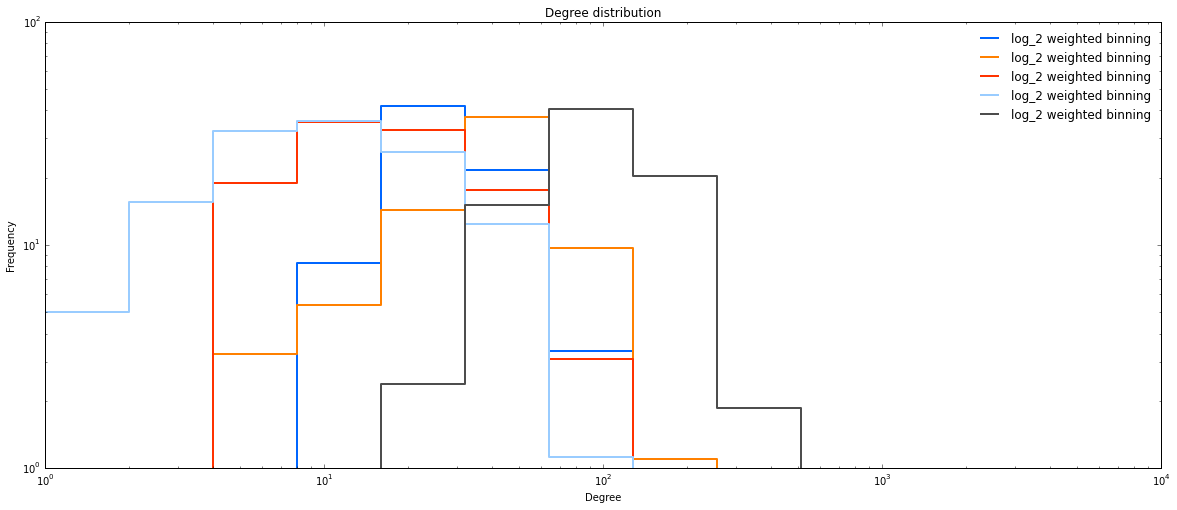

In [59]:

pyplot.figure(figsize=(20,8))
pyplot.title('Degree distribution')
pyplot.ylabel("Frequency")
pyplot.xlabel("Degree")
# pyplot.gca().set_xscale("log")
# pyplot.gca().set_yscale("log")
matplotlib.pyplot.xlim(10**0,10**4)
matplotlib.pyplot.ylim(10**0,10**2)
pyplot.xscale("log")
pyplot.yscale("log")


xLog2, yLog2 = logBinnedHists()
for i in range(5):
#    # lin binning
#    print i
#    degreeDistribution = distribuzioneRangeTutti[0][i], distribuzioneRangeTutti[1], distribuzioneRangeTutti[2]
#    # log_2 binning
    matplotlib.pyplot.step(xLog2, yLog2[i], where='post', color=colori[i], linewidth=2, label='log_2 weighted binning') #where = mid OR post
    # matplotlib.pyplot.plot(xLog2, yLog2)

# legenda e salvataggio
pyplot.legend(loc='upper right', frameon=False)

degreeDistribution
xLog2

In [26]:
# perché i canali non cominciano da zero?!?!?!?!

###  altro approccio, con i dataframe

In [ ]:
dictGradi = dict()
for label in compagnie:
    dictGradi[label] = numpy.loadtxt("../data/DistrGrado_{0}".format(label)).astype(int)

dictGradi

In [ ]:

# TODO vedere se c'è un metodo migliore rispetto a transpose()
dataframeGradi = pandas.DataFrame.from_dict(dictGradi, orient='index').transpose()
# TODO attenzione ai valori NaN nei posti vuoti


In [ ]:
canali = int(max(dataframeGradi.aggregati)-min(dataframeGradi.aggregati))

kwds = {
    "bins": canali,
    "histtype": 'step',
    # "color": colori,
    #"fill": True,
    #"alpha": 0.25,
    #"linestyle": "solid",
    #"edgecolor": "black"
}

dataframeGradi.plot(kind='hist', loglog=True, figsize=(20,8), **kwds)

In [ ]:
# TODO funzione numpy.diff per la correlazione connessa
numpy.diff([0,4,6,2,8,9,7,0,1])